# Beam forming simulation

Date: Nov 21, 2018

## One sample shift

Speed of sound: $c = 343[m/s]$

Sampling frequency: $f_s = 19500 [kHz]$

Length of one-sample shift: $s = 323/19500[m] = 17.6[mm]$

## Angles at n shift

- d: distance between MEMS microphones
- n: the number of shifts

In [28]:
import numpy as np

def theta(d, n):
    return np.arccos(17.6*n/d) * 180 / np.pi

In [29]:
# d = 17.6mm: max n = 1

theta(17.6, 0), theta(17.6, 1)

(90.0, 0.0)

In [30]:
# d = 20mm: max n = 1

theta(20.0, 0), theta(20.0, 1)

(90.0, 28.357636576327966)

In [31]:
# d = 35.2mm: max n = 2

theta(35.2, 0), theta(35.2, 1), theta(35.2, 2)

(90.0, 60.00000000000001, 0.0)

In [32]:
# d = 40mm: max n = 2

theta(40, 0), theta(40, 1), theta(40, 2)

(90.0, 63.8961188626601, 28.357636576327966)

## Null frequencies

$ f = \frac  {c (2m - 1)} {2 \cdot s \cdot n} $

In [33]:
s = 17.6
c = 343.0 * 1000

def calc_null_freq(n, m):
    return int((c*(2*m-1))/(s*n*2))

In [34]:
calc_null_freq(1, 1)

9744

In [35]:
calc_null_freq(2, 1), calc_null_freq(2, 2)

(4872, 14616)

## Conclusion

d = 20mm is the best for human activity recognition in a living room.

## Response of a two microphone array with 20mm spacing

$$\int_{0}^{T} \Bigl( f_1(t) + f_2(t - \frac{d \cos \theta}{c}) \Bigr)^2 dt$$

Descrete form:
$$\sum_{n=0}^{N-1} \Bigl( f_1[n] + f_2[n] \Bigr)^2$$

In this project, N = 1024.

$$ \omega = 2 \pi f$$
$$ t = \frac{n}{f_s} $$

$$ f_1[n] = \sin \Bigl( \omega \frac{n}{f_s} \Bigr) $$

$$ f_2[n] = \sin \Bigl( \omega (\frac{n}{f_s} - \frac{d \cos \theta}{c}) \Bigr) $$

In [40]:
f_s = 80_000_000.0 / 128 / 32
omega = lambda f: 2 * np.pi * f
d = 20.0 / 1000  # 20mm
c = 343  # 343m/s
N = 1024

t = lambda n: n / f_s
def f1(n, f):
    return np.sin(omega(f) * t(n))
def f2(n, f, theta):
    return np.sin(omega(f) * (t(n) - (d * np.cos(theta)/c)))
n = np.linspace(0, N, N)

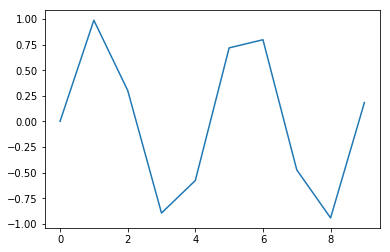

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(f1(n, 4400)[:10])

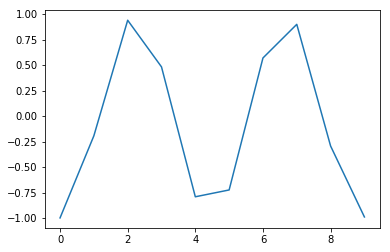

In [44]:
plt.plot(f2(n, 4400, 0)[:10])

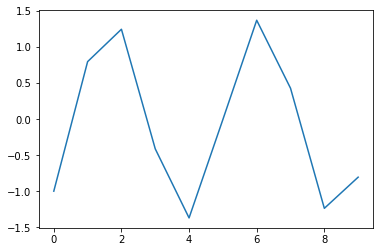

In [45]:
plt.plot(f1(n, 4400)[:10]+f2(n, 4400, 0)[:10])